In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/data_2024_3.csv', encoding='euc-kr')

# Shuffle the data
data = data.sample(frac=1).reset_index(drop=True)

print(data.head())
# Define split ratios
train_ratio = 0.7
validation_ratio = 0.15
test_ratio = 0.15

# Split the data into training, validation, and testing sets
train_data, temp_data = train_test_split(data, test_size=(1 - train_ratio))
val_data, test_data = train_test_split(temp_data, test_size=test_ratio/(test_ratio + validation_ratio))

# Save the splits to CSV files if needed
train_data.to_csv("train_data.csv", index=False)
val_data.to_csv("val_data.csv", index=False)
test_data.to_csv("test_data.csv", index=False)

     관측지점              관측시간  관측온도  관측습도    관측기압  관측풍속   관측풍향  관측최대풍속  관측미세먼지  \
0   청주_산단  2024-03-15 07:20   1.8  92.1  1019.0   0.3    7.6     0.6    57.6   
1   구미_산림  2024-03-16 17:40  17.6  23.8   986.2   0.4  259.3     1.4    64.1   
2  충주_주거1  2024-03-29 08:30   7.7  72.0   992.4   0.7  323.2     2.6   164.3   
3    관악_숲  2024-03-11 17:40   9.1  52.5   997.1   1.5  286.3     2.5    18.2   
4   대구_주거  2024-03-06 22:10   6.1  61.9  1017.6   2.2   71.4     NaN    18.9   

   관측초미세먼지  ...  (AVOC)배관관측온도  (BVOC)관측온도  (BVOC)관측습도  (BVOC)관측기압  (BVOC)관측풍속  \
0     50.8  ...         106.5         1.8        92.1      1019.0         0.3   
1     32.6  ...         105.5        17.6        23.7       986.2         0.4   
2     59.5  ...         107.9         7.6        73.2       992.4         0.7   
3     13.4  ...         105.1         9.2        52.2       997.0         1.5   
4     14.7  ...         102.5         6.1        62.0      1017.6         2.1   

   (BVOC)관측풍향  (BVOC)관측최대풍속  (BV

In [33]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler

# 데이터 불러오기 (전처리 완료된 데이터라고 가정)
data_train = pd.read_csv('train_data.csv')
data_test = pd.read_csv('test_data.csv')

# 특성과 타겟 변수 분리
target_var = "관측미세먼지"
string_column = ["관측미세먼지", "관측지점", "관측시간"]

X_train = data_train.drop(columns=[target_var]).values
y_train = data_train[target_var].values

X_test = data_test.drop(columns=[target_var]).values
y_test = data_test[target_var].values

# 각각 train과 test를 알맞게 데이터와 매치, 관측 지점과 관측시간은 숫자형이 아니라서 일단 배제,추후 필요없는 특성이면 drop, 아니라면 다른 전처리 필요
X_train = train_data.drop(columns=["관측미세먼지", "관측지점", "관측시간"]).apply(pd.to_numeric, errors='coerce').fillna(0).values
X_test = test_data.drop(columns=["관측미세먼지", "관측지점", "관측시간"]).apply(pd.to_numeric, errors='coerce').fillna(0).values
y_train = train_data["관측미세먼지"].apply(pd.to_numeric, errors='coerce').fillna(0).values
y_test = test_data["관측미세먼지"].apply(pd.to_numeric, errors='coerce').fillna(0).values


# NaN 값 확인
print("NaN values in X_train:", np.isnan(X_train).sum())
print("NaN values in y_train:", np.isnan(y_train).sum())
print("NaN values in X_test:", np.isnan(X_test).sum())
print("NaN values in y_test:", np.isnan(y_test).sum())

NaN values in X_train: 0
NaN values in y_train: 0
NaN values in X_test: 0
NaN values in y_test: 0


In [34]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler

# 데이터 불러오기 (전처리 완료된 데이터라고 가정)
data_train = pd.read_csv('train_data.csv')
data_test = pd.read_csv('test_data.csv')

# 특성과 타겟 변수 분리
target_var = "관측미세먼지"
string_column = ["관측미세먼지", "관측지점", "관측시간"]

X_train = data_train.drop(columns=[target_var]).values
y_train = data_train[target_var].values

X_test = data_test.drop(columns=[target_var]).values
y_test = data_test[target_var].values

# 각각 train과 test를 알맞게 데이터와 매치, 관측 지점과 관측시간은 숫자형이 아니라서 일단 배제,추후 필요없는 특성이면 drop, 아니라면 다른 전처리 필요
X_train = train_data.drop(columns=["관측미세먼지", "관측지점", "관측시간"]).apply(pd.to_numeric, errors='coerce').fillna(0).values
X_test = test_data.drop(columns=["관측미세먼지", "관측지점", "관측시간"]).apply(pd.to_numeric, errors='coerce').fillna(0).values
y_train = train_data["관측미세먼지"].apply(pd.to_numeric, errors='coerce').fillna(0).values
y_test = test_data["관측미세먼지"].apply(pd.to_numeric, errors='coerce').fillna(0).values

# 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 데이터셋 축소, 시연에서는 10%만 사용
X_train, _, y_train, _ = train_test_split(X_train, y_train, train_size=0.1, random_state=42)
X_test, _, y_test, _ = train_test_split(X_test, y_test, train_size=0.1, random_state=42)

# Tensor로 변환
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# DataLoader 정의
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Transformer 모델 정의
class TransformerModel(nn.Module):
    def __init__(self, input_size, output_size, d_model=64, nhead=8, num_layers=3, dim_feedforward=256, dropout=0.1):
        super(TransformerModel, self).__init__()
        self.encoder = nn.Linear(input_size, d_model)
        self.pos_encoder = nn.Parameter(torch.zeros(1, d_model))
        encoder_layers = nn.TransformerEncoderLayer(d_model, nhead, dim_feedforward, dropout)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layers, num_layers)
        self.decoder = nn.Linear(d_model, output_size)

    def forward(self, src):
        src = self.encoder(src) + self.pos_encoder
        src = src.unsqueeze(1)  # (batch_size, seq_len=1, d_model)
        src = self.transformer_encoder(src)
        output = self.decoder(src[:, -1, :])
        return output

# 가중치 초기화 함수 정의
def init_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)
        m.bias.data.fill_(0.01)
    elif isinstance(m, nn.TransformerEncoderLayer):
        for p in m.parameters():
            if p.dim() > 1:
                nn.init.xavier_uniform_(p)

# 모델 초기화
input_size = X_train.shape[1]
output_size = 1
model = TransformerModel(input_size, output_size).to(X_train.device)
model.apply(init_weights)

# 손실 함수 및 옵티마이저 정의
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # 학습률 조정

# 모델 학습
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * X_batch.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}')

# 예측 함수 정의
def predict(model, X_test):
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test)
    return y_pred.cpu().numpy()

# 예측 후 결과 저장
predicted_values = predict(model, X_test)

# 결과를 npy 값으로 저장, 다음 파일에서 사용 가능
np.save('Transformer.npy', predicted_values)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch [1/20], Loss: 1901.6874
Epoch [2/20], Loss: 1426.4572
Epoch [3/20], Loss: 1060.4597
Epoch [4/20], Loss: 820.1180
Epoch [5/20], Loss: 656.8151
Epoch [6/20], Loss: 539.4206
Epoch [7/20], Loss: 453.7961
Epoch [8/20], Loss: 391.7420
Epoch [9/20], Loss: 345.5074
Epoch [10/20], Loss: 308.4858
Epoch [11/20], Loss: 277.9696
Epoch [12/20], Loss: 252.5078
Epoch [13/20], Loss: 230.3962
Epoch [14/20], Loss: 213.5221
Epoch [15/20], Loss: 194.7178
Epoch [16/20], Loss: 180.0737
Epoch [17/20], Loss: 167.3253
Epoch [18/20], Loss: 156.3360
Epoch [19/20], Loss: 146.6922
Epoch [20/20], Loss: 136.5313


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch [1/100], Train Loss: 1904.5811, Test Loss: 1735.6448
Epoch [2/100], Train Loss: 1430.8743, Test Loss: 1293.0950
Epoch [3/100], Train Loss: 1060.7315, Test Loss: 987.8601
Epoch [4/100], Train Loss: 819.0234, Test Loss: 780.6949
Epoch [5/100], Train Loss: 654.3148, Test Loss: 636.7070
Epoch [6/100], Train Loss: 537.4226, Test Loss: 528.8153
Epoch [7/100], Train Loss: 453.7066, Test Loss: 452.6385
Epoch [8/100], Train Loss: 391.4365, Test Loss: 394.8867
Epoch [9/100], Train Loss: 344.3593, Test Loss: 349.9696
Epoch [10/100], Train Loss: 306.5978, Test Loss: 315.3376
Epoch [11/100], Train Loss: 277.1121, Test Loss: 284.8279
Epoch [12/100], Train Loss: 251.0755, Test Loss: 259.4399
Epoch [13/100], Train Loss: 229.7255, Test Loss: 236.3304
Epoch [14/100], Train Loss: 210.7927, Test Loss: 218.2140
Epoch [15/100], Train Loss: 193.9307, Test Loss: 202.3527
Epoch [16/100], Train Loss: 179.7867, Test Loss: 188.8931
Epoch [17/100], Train Loss: 167.8794, Test Loss: 177.0030
Epoch [18/100], Tr

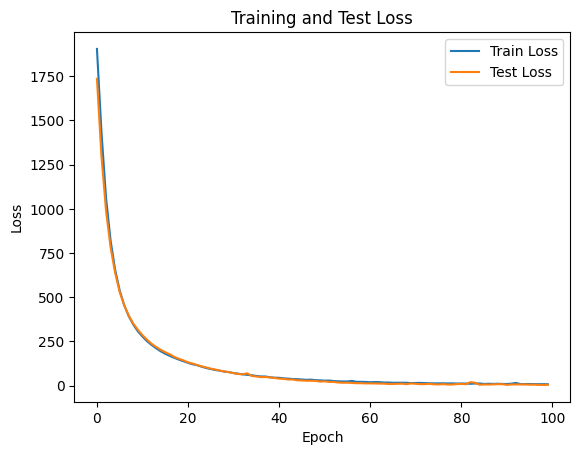

In [39]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 데이터 불러오기 (전처리 완료된 데이터라고 가정)
data_train = pd.read_csv('train_data.csv')
data_test = pd.read_csv('test_data.csv')

# 특성과 타겟 변수 분리
target_var = "관측미세먼지"
string_column = ["관측미세먼지", "관측지점", "관측시간"]

X_train = data_train.drop(columns=[target_var]).values
y_train = data_train[target_var].values

X_test = data_test.drop(columns=[target_var]).values
y_test = data_test[target_var].values

# 각각 train과 test를 알맞게 데이터와 매치, 관측 지점과 관측시간은 숫자형이 아니라서 일단 배제,추후 필요없는 특성이면 drop, 아니라면 다른 전처리 필요
X_train = train_data.drop(columns=["관측미세먼지", "관측지점", "관측시간"]).apply(pd.to_numeric, errors='coerce').fillna(0).values
X_test = test_data.drop(columns=["관측미세먼지", "관측지점", "관측시간"]).apply(pd.to_numeric, errors='coerce').fillna(0).values
y_train = train_data["관측미세먼지"].apply(pd.to_numeric, errors='coerce').fillna(0).values
y_test = test_data["관측미세먼지"].apply(pd.to_numeric, errors='coerce').fillna(0).values

# 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 데이터셋 축소, 시연에서는 10%만 사용
X_train, _, y_train, _ = train_test_split(X_train, y_train, train_size=0.1, random_state=42)
X_test, _, y_test, _ = train_test_split(X_test, y_test, train_size=0.1, random_state=42)

# Tensor로 변환
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# DataLoader 정의
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Transformer 모델 정의
class TransformerModel(nn.Module):
    def __init__(self, input_size, output_size, d_model=64, nhead=8, num_layers=3, dim_feedforward=256, dropout=0.1):
        super(TransformerModel, self).__init__()
        self.encoder = nn.Linear(input_size, d_model)
        self.pos_encoder = nn.Parameter(torch.zeros(1, d_model))
        encoder_layers = nn.TransformerEncoderLayer(d_model, nhead, dim_feedforward, dropout)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layers, num_layers)
        self.decoder = nn.Linear(d_model, output_size)

    def forward(self, src):
        src = self.encoder(src) + self.pos_encoder
        src = src.unsqueeze(1)  # (batch_size, seq_len=1, d_model)
        src = self.transformer_encoder(src)
        output = self.decoder(src[:, -1, :])
        return output

# 가중치 초기화 함수 정의
def init_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)
        m.bias.data.fill_(0.01)
    elif isinstance(m, nn.TransformerEncoderLayer):
        for p in m.parameters():
            if p.dim() > 1:
                nn.init.xavier_uniform_(p)

# 모델 초기화
input_size = X_train.shape[1]
output_size = 1
model = TransformerModel(input_size, output_size).to(X_train.device)
model.apply(init_weights)

# 손실 함수 및 옵티마이저 정의
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # 학습률 조정

# Train 및 Test Loss 기록을 위한 리스트 선언
train_losses = []
test_losses = []

# 모델 학습
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * X_batch.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    train_losses.append(epoch_loss)

    # Test 데이터로 Loss 계산
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test)
        test_loss = criterion(test_outputs, y_test)
        test_losses.append(test_loss.item())

    print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {epoch_loss:.4f}, Test Loss: {test_loss.item():.4f}')

# 예측 함수 정의
def predict(model, X_test):
    model.eval()
    with torch.no_grad():
        y_pred = model(X_test)
    return y_pred.cpu().numpy()

# Loss 그래프 그리기
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()
plt.show()